This report will explore a provided mock 1881 census data of an imaginary town. The town, modestly sized and situated between two larger cities with motorway connections, faces key strategic choices regarding development and investment.   The provided mock census data, used the Python Faker package, emulates the format of the 1881 UK census but reflects modern demographics. It includes fields such as name, age, gender, relationship to head of household, marital status, occupation, infirmity, and religion.  
The primary questions that we will try to answer are the following:  
(a) What should be built on an unoccupied plot of land that the local government wishes to develop?   
(b) Which one of the following options (employment and training, old age care, spending on schooling, or general infrastructure) should be invested in?  


### Import libraries

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

### Data cleaning

The provided dataset required cleaning and preparation to analyse. The dataset contained various issues, including:  
  •	Missing values were detected in fields such as Relationship to Head of House, Marital Status, Religion, and Infirmity.  
  •	Inconsistent Marital Status entries, especially for minors (e.g., some underage individuals marked as Married).  
  •	Invalid ages (e.g., over 100, string or float numbers).  
  •	Empty strings such as “N/A”, “Nan”, “NaN”.  
  •	Different format in names in Marital Status such as M, D, S, W, Married, Widowed, Single, Divorced.  
  •	Different format in names in Gender such as M, m, F, f, male, female.   
The following steps were undertaken:  
  •	Removing duplicates.  
  •	Convert age to median age (e.g., age over 100).  
  •	Predicting Marital Status using the column Relationship to Head of House.   
  •	Imputing missing data (e.g., if Religion is missing, we will fill it with “Unknown” status).  

In [ ]:
# Load the dataset
df = pd.read_csv('W-T2_A24census-1.csv')
print(df)

     House Number           Street First Name        Surname Age  \
0               1    Windsor Plaza    Cameron  Johnson-White  37   
1               1    Windsor Plaza  Katherine  Johnson-White  26   
2               1    Windsor Plaza       Jack           Cook  41   
3               2    Windsor Plaza      Marie          Allen  44   
4               3    Windsor Plaza     Janice       Harrison  55   
...           ...              ...        ...            ...  ..   
8170            1  Wilson Barracks      Allan          Begum  26   
8171            1  Wilson Barracks    Melissa          Evans  25   
8172            1  Wilson Barracks      Carly          Patel  25   
8173            1  Wilson Barracks       Gary      Tomlinson  26   
8174            1  Wilson Barracks     Joanna         Wright  36   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married    Male   
1                             Wife        Married  Female   


In [16]:
df.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,NaN,Christian
1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",NaN,NaN
2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,NaN,Methodist
3,2,Windsor Plaza,Marie,Allen,44,Head,Single,Female,Midwife,NaN,Catholic
4,3,Windsor Plaza,Janice,Harrison,55,Head,Single,Female,Warehouse manager,NaN,Christian


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8175 non-null   object
 1   Street                         8175 non-null   object
 2   First Name                     8175 non-null   object
 3   Surname                        8175 non-null   object
 4   Age                            8175 non-null   object
 5   Relationship to Head of House  7687 non-null   object
 6   Marital Status                 6351 non-null   object
 7   Gender                         8175 non-null   object
 8   Occupation                     8175 non-null   object
 9   Infirmity                      63 non-null     object
 10  Religion                       3546 non-null   object
dtypes: object(11)
memory usage: 702.7+ KB


In [18]:
df.describe()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,8175,8175,8175,8175,8175,7687,6351,8175,8175,63,3546
unique,251,104,366,644,118,21,8,8,1109,7,14
top,1,Gregory Ports,Stephanie,Smith,39,Head,Single,Female,Student,,Christian
freq,331,791,39,215,158,3231,2868,4185,1546,14,1924


In [ ]:
# Check missing value
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     488
Marital Status                   1824
Gender                              0
Occupation                          0
Infirmity                        8112
Religion                         4629
dtype: int64

#### Cleaning Age

In [20]:
df['Age'].unique()

array(['37', '26', '41', '44', '55', '63', '36', '38', '57', '81', '79',
       '58', '65', '43', '53', '32', '34', '9', '20', '47', '19', '21',
       '45', '77', '68', '73', '75', '78', '54', '50', '80', '42', '66',
       '23', '24', '70', '27', '76', '35', '29', '62', '71', '46', '30',
       '13', '61', '8', '7', '64', '5', '4', '0', '56', '52', '17', '16',
       '3', '14', '28', '18', '15', '51', '31', '11', '49', '60', '33',
       '2', '1', '40', '10', '83', '48', '59', '25', '6', '39', '69',
       '67', '22', '74', '86', '12', '84', '72', '87', '86.15361167',
       '88', '105', '102', '91', '96', '82', '89', '98', '74.31823574',
       '70.31823574', '94', '101', '85', '90', '103', '97', '93', '92',
       '107', '62.87489477', '78.10140531', '80.10140531', '99', 'three',
       '80.99563212', '87.99563212', '114', '117', '55.53517458',
       '61.53517458', '95'], dtype=object)

In [ ]:
df['Age'] = df['Age'].replace("three",3)
df['Age'] = df['Age'].astype(float).astype(int)
df['Age'] = df['Age'].astype(float).round().astype(int)
# The result
df['Age'].unique()

array([ 37,  26,  41,  44,  55,  63,  36,  38,  57,  81,  79,  58,  65,
        43,  53,  32,  34,   9,  20,  47,  19,  21,  45,  77,  68,  73,
        75,  78,  54,  50,  80,  42,  66,  23,  24,  70,  27,  76,  35,
        29,  62,  71,  46,  30,  13,  61,   8,   7,  64,   5,   4,   0,
        56,  52,  17,  16,   3,  14,  28,  18,  15,  51,  31,  11,  49,
        60,  33,   2,   1,  40,  10,  83,  48,  59,  25,   6,  39,  69,
        67,  22,  74,  86,  12,  84,  72,  87,  88, 105, 102,  91,  96,
        82,  89,  98,  94, 101,  85,  90, 103,  97,  93,  92, 107,  99,
       114, 117,  95])

In [22]:
# Calculate the median age
median_age = df['Age'].median()

# Function to replace age > 100 with median age
def replace_age(age):
  if age > 100:
    return median_age
  else:
    return age

# Apply the function to the 'Age' column
df['Age'] = df['Age'].apply(replace_age)

# Convert ages to integers to remove decimal points
df['Age'] = df['Age'].astype(int)

# Print unique values in the 'Age' column
print(df['Age'].unique())

# Save the corrected DataFrame to the existing file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

[37 26 41 44 55 63 36 38 57 81 79 58 65 43 53 32 34  9 20 47 19 21 45 77
 68 73 75 78 54 50 80 42 66 23 24 70 27 76 35 29 62 71 46 30 13 61  8  7
 64  5  4  0 56 52 17 16  3 14 28 18 15 51 31 11 49 60 33  2  1 40 10 83
 48 59 25  6 39 69 67 22 74 86 12 84 72 87 88 91 96 82 89 98 94 85 90 97
 93 92 99 95]


#### Clean Religion

In [23]:
df['Religion'].unique()

array(['Christian', nan, 'Methodist', 'Catholic', 'Muslim', 'Sikh',
       'Jewish', 'Baptist', 'Agnostic', 'Nope', ' ', 'Housekeeper',
       'Private', 'Quaker', 'Buddist'], dtype=object)

In [24]:
# Clean the data by filling NaN values
df['Religion'] = df['Religion'].fillna(str("Unknown"))

In [ ]:
# Clean the joking religion names
df['Religion'] = df['Religion'].replace(['Mode', 'Nope', 'Private', 'Housekeeper', ' '], 'Unknown')

In [26]:
df['Religion'].unique()

array(['Christian', 'Unknown', 'Methodist', 'Catholic', 'Muslim', 'Sikh',
       'Jewish', 'Baptist', 'Agnostic', 'Quaker', 'Buddist'], dtype=object)

C:\Users\sofji\AppData\Local\Temp\ipykernel_21544\2475933367.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  religion_by_age = df.groupby(['Age Group', 'Religion']).size().unstack(fill_value=0)


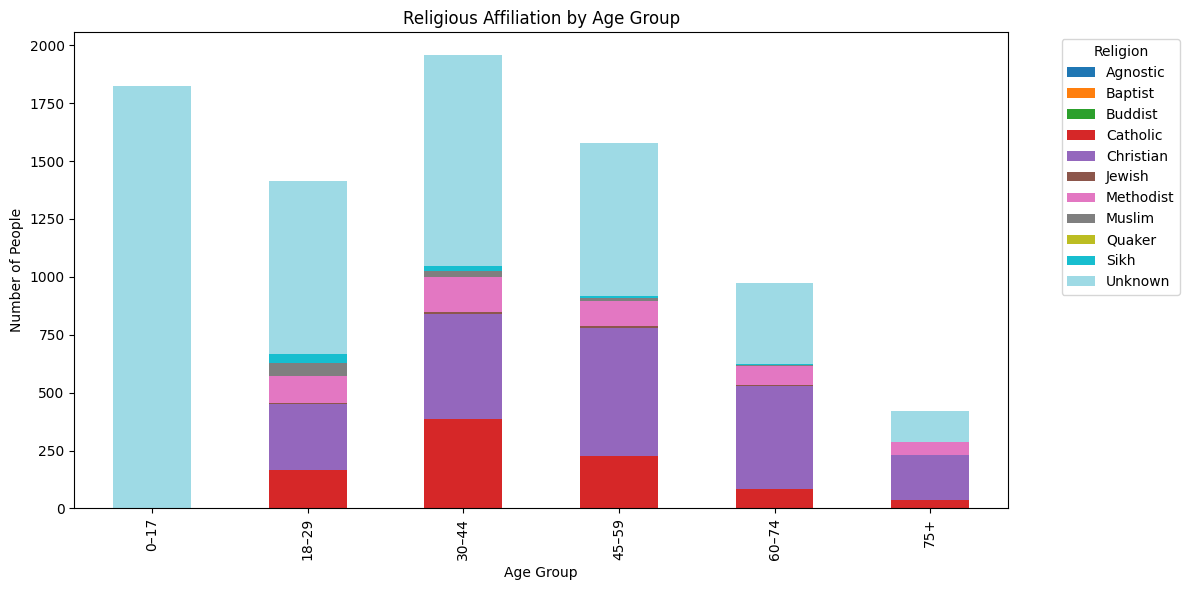

In [3]:
# Identify increasing or decreasing religeons.
df = pd.read_csv('W-T2_A24census-1 - Copy_cor.csv')

# Clean Age and Religion
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'Religion'])
df['Age'] = df['Age'].astype(int)
df['Religion'] = df['Religion'].astype(str).str.strip().str.title()

# Create age groups
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0–17', '18–29', '30–44', '45–59', '60–74', '75+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count people per religion per age group
religion_by_age = df.groupby(['Age Group', 'Religion']).size().unstack(fill_value=0)

# Plot: stacked bar chart
religion_by_age.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Religious Affiliation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('religion.png', bbox_inches='tight') 
plt.show()

Based on the findings, the majority of individuals from 0 to 17 are children who do not decided about religion, also, in each age group we can find those people, but in the age from 60 to 75+ the number is decreasing, especially in Catholic and Unknown religion. Then, numerous residents identify as Christian, roughly it is in the same level in each age group. On second place is Catholic and on third is Methodist. 

#### Changing names to one format

In [27]:
name_mapping = {
    'D': 'Divorced',  # Replace with the actual meaning of 'D'
    'S': 'Single',    # Replace with the actual meaning of 'S'
    'W': 'Widowed',   # Replace with the actual meaning of 'W'
    'M': 'Married'    # Replace with the actual meaning of 'M'
}

# Use the replace method to change the names
df['Marital Status'] = df['Marital Status'].replace(name_mapping)

# Save the corrected DataFrame to a new file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

print(df['Marital Status'].unique())

['Married' 'Divorced' 'Single' 'Widowed' nan]


In [28]:
name_gender = {
    'M': 'Male',  
    'm': 'Male',    
    'F': 'Female',   
    'f': 'Female',    
    'male': 'Male',
    'female': 'Female',
}

# Use the replace method to change the names
df['Gender'] = df['Gender'].replace(name_gender)

# Save the corrected DataFrame to a new file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

print(df['Gender'].unique())

['Male' 'Female']


#### Clean Relationship to Head of House

In [ ]:
duplicated_surnames = df[df['Surname'].duplicated()]['Surname']

surname_counts = df['Surname'].value_counts()

# Calculate more that 1 surname
print(surname_counts[surname_counts > 1].index)

Index(['Smith', 'Jones', 'Williams', 'Taylor', 'Brown', 'Davies', 'Evans',
       'Roberts', 'Johnson', 'Thomas',
       ...
       'Cook-Thomas', 'O'Brien-Townsend', 'Chandler-Warner', 'Johnson-Mason',
       'Parry-Lynch', 'Phillips-Doyle', 'Nixon', 'Simmons-Chambers', 'Collier',
       'Arnold'],
      dtype='object', name='Surname', length=568)


In [ ]:
 # Identify Duplicate Surnames
duplicate_surnames_df = df[df['Surname'].duplicated(keep=False)]

# Group by Surname and Find Most Frequent Relationship
most_frequent_relationships = duplicate_surnames_df.groupby('Surname')['Relationship to Head of House'].agg(lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else 'Unknown')

# Count Occurrences of Each Relationship
relationship_counts = most_frequent_relationships.value_counts()

print(relationship_counts)

Relationship to Head of House
Head             442
Son               56
Daughter          39
Husband            9
Partner            6
Wife               5
Lodger             4
Granddaughter      3
Grandson           3
Unknown            1
Name: count, dtype: int64


We found out that there are surname duplicates. A lot of them belong to son and daughter. That is why we decided to change the missing values on Sibling.

In [31]:
# Clean the data by filling NaN values with the Sibling
df['Relationship to Head of House'] = df['Relationship to Head of House'].fillna(str("Sibling"))

# Save the corrected DataFrame to a new file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

In [32]:
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Lodger', 'Partner', 'Husband', 'Son', 'Sibling',
       'Daughter', 'Granddaughter', 'Grandson', 'Nephew', 'Step-Son',
       'Cousin', 'Step-Daughter', 'Adopted Daughter', 'Visitor', 'Neice',
       'Adopted Son', 'Adopted Grandson', ' ', 'Adopted Granddaughter'],
      dtype=object)

#### Clean Marital status

In [ ]:
# Find whether the person is married and under 18
married_under_18 = df[(df['Marital Status'] == 'Married') & (df['Age'] < 18)]

print(married_under_18)
print(len(married_under_18))

     House Number         Street First Name   Surname  Age  \
6683           25  Upland Street      Tracy     Davis   17   
7049            1     Lewis Pike      Helen  Williams   17   

     Relationship to Head of House Marital Status  Gender Occupation  \
6683                          Head        Married  Female    Student   
7049                          Head        Married  Female    Student   

     Infirmity Religion  
6683       NaN  Unknown  
7049       NaN  Unknown  
2


In [ ]:
# Delete rows where the person is married and under 18
df = df.drop(df[(df['Marital Status'] == 'Married') & (df['Age'] < 18)].index)

print(df)

     House Number           Street First Name        Surname  Age  \
0               1    Windsor Plaza    Cameron  Johnson-White   37   
1               1    Windsor Plaza  Katherine  Johnson-White   26   
2               1    Windsor Plaza       Jack           Cook   41   
3               2    Windsor Plaza      Marie          Allen   44   
4               3    Windsor Plaza     Janice       Harrison   55   
...           ...              ...        ...            ...  ...   
8170            1  Wilson Barracks      Allan          Begum   26   
8171            1  Wilson Barracks    Melissa          Evans   25   
8172            1  Wilson Barracks      Carly          Patel   25   
8173            1  Wilson Barracks       Gary      Tomlinson   26   
8174            1  Wilson Barracks     Joanna         Wright   36   

     Relationship to Head of House Marital Status  Gender  \
0                             Head        Married    Male   
1                             Wife        Married

The next step will be predict the Marital Status. Whether it will be Single, Married, Divorced or Widowed

In [35]:
# Create a mapping for Relationship to Marital Status
relationship_mapping = {
    'Spouse': 'Married',
    'Child': 'Single',
    'Parent': 'Divorced',
    'Sibling': 'Single',
    'Other relative': 'Unknown',
    'Non-relative': 'Unknown'
}

df['Predicted_Marital_Status'] = df['Relationship to Head of House'].map(relationship_mapping)

occupation_marital_status = df.groupby('Occupation')['Predicted_Marital_Status'].value_counts(normalize=True).unstack().fillna(0)
print(occupation_marital_status)

print(df[['Predicted_Marital_Status']].head())

Predicted_Marital_Status                          Single
Occupation                                              
Accommodation manager                                1.0
Accounting technician                                1.0
Administrator                                        1.0
Administrator, charities/voluntary organisations     1.0
Administrator, local government                      1.0
...                                                  ...
Video editor                                         1.0
Volunteer coordinator                                1.0
Water engineer                                       1.0
Writer                                               1.0
Youth worker                                         1.0

[266 rows x 1 columns]
  Predicted_Marital_Status
0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN


In [ ]:
# Change missing values to Single because there are numerous people whose occupation is student or child and they are siblings to head of the house.
df['Marital Status'] = df['Marital Status'].fillna(str("Single"))

# Save the corrected DataFrame to a new file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

#### Clean Infirmity

In [ ]:
# Identify the missing values
df['Infirmity'].isnull().sum()

np.int64(8110)

In [ ]:
# We created a new categoty 'Unknown' because there are a lot of records that we do not know the illness.
df['Infirmity'] = df['Infirmity'].fillna(str("Unknown"))

# Save the corrected DataFrame to a new file
df.to_csv('W-T2_A24census-1 - Copy_cor.csv', index=False)

In [39]:
df.head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Predicted_Marital_Status
0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,Unknown,Christian,NaN
1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",Unknown,Unknown,NaN
2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,Unknown,Methodist,NaN
3,2,Windsor Plaza,Marie,Allen,44,Head,Single,Female,Midwife,Unknown,Catholic,NaN
4,3,Windsor Plaza,Janice,Harrison,55,Head,Single,Female,Warehouse manager,Unknown,Christian,NaN
5,4,Windsor Plaza,Charlotte,Bishop,63,Head,Divorced,Female,"Education officer, environmental",Unknown,Christian,NaN
6,1,Gracehawk Street,Stephen,Thompson,36,Head,Single,Male,Air broker,Unknown,Unknown,NaN
7,1,Gracehawk Street,Lesley,King,38,Partner,Single,Female,Musician,Unknown,Unknown,NaN
8,2,Gracehawk Street,Graeme,Wilson,57,Head,Single,Male,Commercial horticulturist,Unknown,Christian,NaN
9,3,Gracehawk Street,June,Collins,81,Head,Widowed,Female,Retired Special effects artist,Unknown,Christian,NaN


In [ ]:
# Delete useless column
df = df.drop(columns=['Predicted_Marital_Status'])

In [41]:
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,Unknown,Christian
1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",Unknown,Unknown
2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,Unknown,Methodist
3,2,Windsor Plaza,Marie,Allen,44,Head,Single,Female,Midwife,Unknown,Catholic
4,3,Windsor Plaza,Janice,Harrison,55,Head,Single,Female,Warehouse manager,Unknown,Christian


### Early analysis

#### Create a histogram by marital status

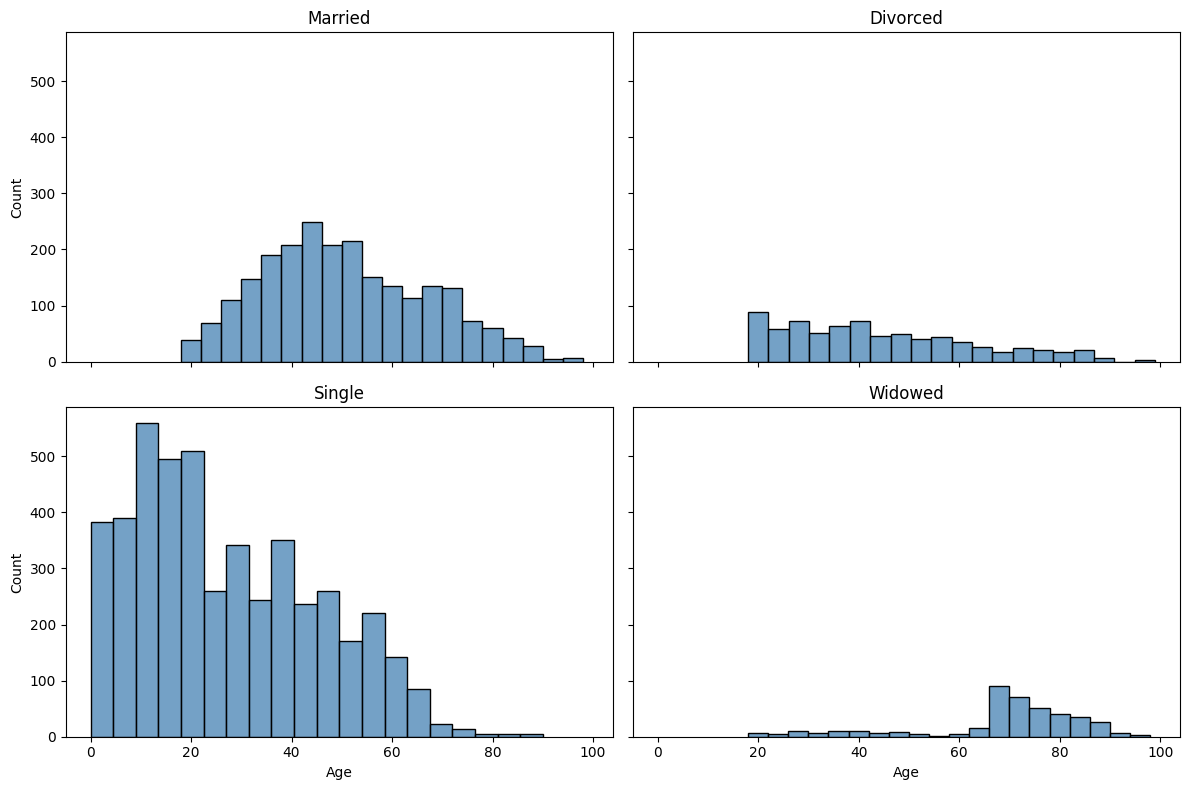

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the marital statuses
statuses = ['Married', 'Divorced', 'Single', 'Widowed']

# Set up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each marital status
for i, status in enumerate(statuses):
    sns.histplot(
        df[df['Marital Status'] == status]['Age'],
        bins=20,
        kde=False,
        ax=axes[i],
        color='steelblue'
    )
    axes[i].set_title(status)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig('marital_status.png', bbox_inches='tight') 
plt.show()

Histograms made by marital status shows that most of the young population is single, but there are some married young age individuals under 18. We deleted them from the data as it will not influence on the results. The highest number divorced is presented as well. The number of widowed residents is higher in older age (approximately between 65-85), which means that they need healthcare needs.

#### Check age, gender, marital status, occupation and religion distribution 

In [45]:
df['Age'].describe()

count    8173.000000
mean       37.161018
std        21.638834
min         0.000000
25%        19.000000
50%        36.000000
75%        53.000000
max        99.000000
Name: Age, dtype: float64

In [46]:
df['Gender'].describe()

count       8173
unique         2
top       Female
freq        4270
Name: Gender, dtype: object

In [48]:
df['Marital Status'].describe()

count       8173
unique         4
top       Single
freq        4694
Name: Marital Status, dtype: object

In [51]:
df['Occupation'].describe()

count        8173
unique       1109
top       Student
freq         1544
Name: Occupation, dtype: object

In [79]:
df['Religion'].describe()

count          3546
unique           14
top       Christian
freq           1924
Name: Religion, dtype: object

#### Calculate the Number of potential commuters

In [ ]:
import pandas as pd

df = pd.read_csv('W-T2_A24census-1.csv')

#Identify Potential Commuters 
occupation_counts = df['Occupation'].value_counts()
threshold = 5 

potential_commuters_low_frequency = df[df['Occupation'].isin(occupation_counts[occupation_counts <= threshold].index)]
print(f"\nNumber of potential commuters (based on low-frequency occupations, excluding 'Retired' and 'Unemployed'): {len(potential_commuters_low_frequency[~potential_commuters_low_frequency['Occupation'].str.contains('Retired|Unemployed', case=False, na=False)])}")

print("\nExamples of low-frequency occupations potentially indicating commuting:")
print(potential_commuters_low_frequency['Occupation'].unique())


Number of potential commuters (based on low-frequency occupations, excluding 'Retired' and 'Unemployed'): 831

Examples of low-frequency occupations potentially indicating commuting:
['Air broker' 'Musician' 'Retired Special effects artist'
 'Retired Engineer, building services' 'Software engineer'
 'Lecturer, further education'
 'Retired Government social research officer' 'Retired Financial trader'
 'Retired Dispensing optician' 'Retired Immigration officer'
 'Retired Designer, graphic' 'Retired Teacher, special educational needs'
 'Retired Museum education officer' 'Retired Programmer, multimedia'
 'Astronomer' 'Industrial/product designer' 'Retired Corporate treasurer'
 'Retired Drilling engineer' 'Retired Haematologist'
 'Retired Manufacturing systems engineer' 'Civil engineer, consulting'
 'Retired Medical illustrator' 'Retired Neurosurgeon'
 'Estate manager/land agent' 'Conservation officer, historic buildings'
 'Dramatherapist' 'Freight forwarder' 'Communications engineer'
 'I

Number of potential commuters (based on low-frequency occupations, excluding 'Retired' and 'Unemployed'): 831. This data suggests that numerous students and children travel to another city on a daily basis. 

#### Make a visualisation of 10 most common occupations

Employment Status Distribution:
 Occupation
Student                                       1546
Unemployed                                     511
University Student                             504
Child                                          382
Exhibitions officer, museum/gallery             16
                                              ... 
Retired Scientist, marine                        1
Retired Tourist information centre manager       1
Retired Mechanical engineer                      1
Retired Journalist, magazine                     1
Retired Nature conservation officer              1
Name: count, Length: 1109, dtype: int64

Unemployment Rate: 100.00%

Top 10 Occupations (Excluding 'Retired' and 'Unemployed'):
 Occupation
Student                                1546
University Student                      504
Child                                   382
Exhibitions officer, museum/gallery      16
Geophysical data processor               15
PhD Student                        

C:\Users\sofji\AppData\Local\Temp\ipykernel_21544\2223897102.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')


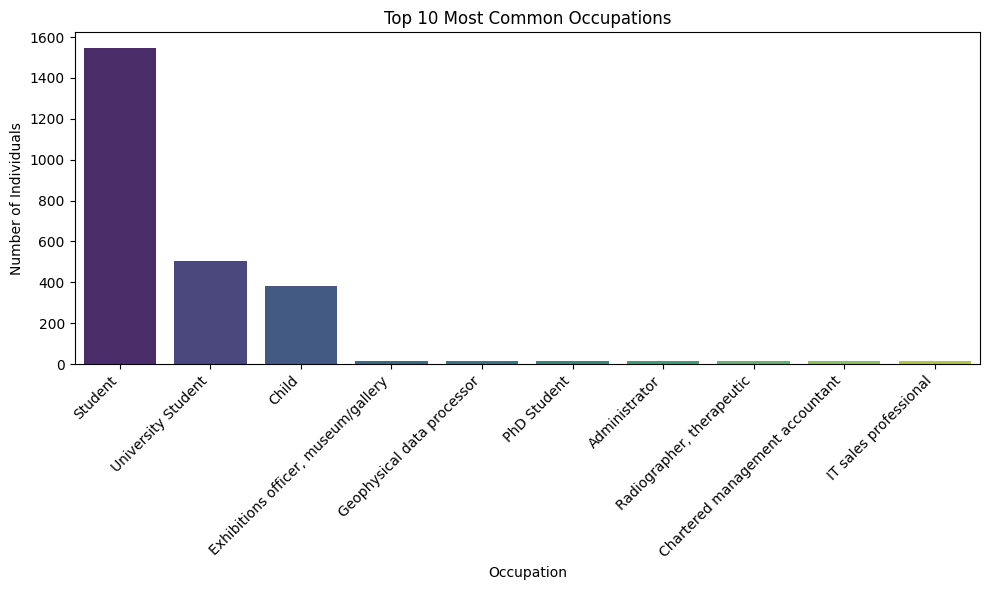

In [5]:
df = pd.read_csv('W-T2_A24census-1.csv')

# Analyze Employment Status
employment_counts = df['Occupation'].value_counts()
print("Employment Status Distribution:\n", employment_counts)

unemployed_count = employment_counts.get('Unemployed', 0)
labor_force = employment_counts.get('Employed', 0) + unemployed_count

if labor_force > 0:
    unemployment_rate = (unemployed_count / labor_force) * 100
    print(f"\nUnemployment Rate: {unemployment_rate:.2f}%")
else:
    print("\nCould not calculate unemployment rate (no employed or unemployed individuals found).")

# Identify Common Occupations (Excluding 'Retired' and 'Unemployed')
occupation_counts = df[~df['Occupation'].str.contains('Retired|Unemployed', case=False, na=False)]['Occupation'].value_counts().nlargest(10)
print("\nTop 10 Occupations (Excluding 'Retired' and 'Unemployed'):\n", occupation_counts)

# Make a plot
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.title('Top 10 Most Common Occupations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('occupation.png', bbox_inches='tight') 
plt.show()

working_population = df[~df['Occupation'].str.contains('Retired|Unemployed')]

Occupational data illustrates a mix of professions typical of a commuter town. A large number of residents are students and children, but there are employed people in education, IT sales and administration fields.

#### Calculate unemployement trend

In [78]:
unemployed_counts = df[df['Occupation'].str.contains('Retired|Unemployed')]['Occupation'].value_counts().nlargest(10)
print(unemployed_counts)

Occupation
Unemployed                          511
Retired Media buyer                   5
Retired Actuary                       5
Retired Lawyer                        5
Retired Stage manager                 5
Retired Investment analyst            5
Retired Surgeon                       5
Retired Advertising art director      5
Retired Public house manager          4
Retired Forensic scientist            4
Name: count, dtype: int64


#### Create Population Pyramid  
Population pyramid, graphical representation of the age and sex composition of a specific population.  

C:\Users\sofji\AppData\Local\Temp\ipykernel_21544\1909672916.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age', 'Gender']).size().unstack().fillna(0)


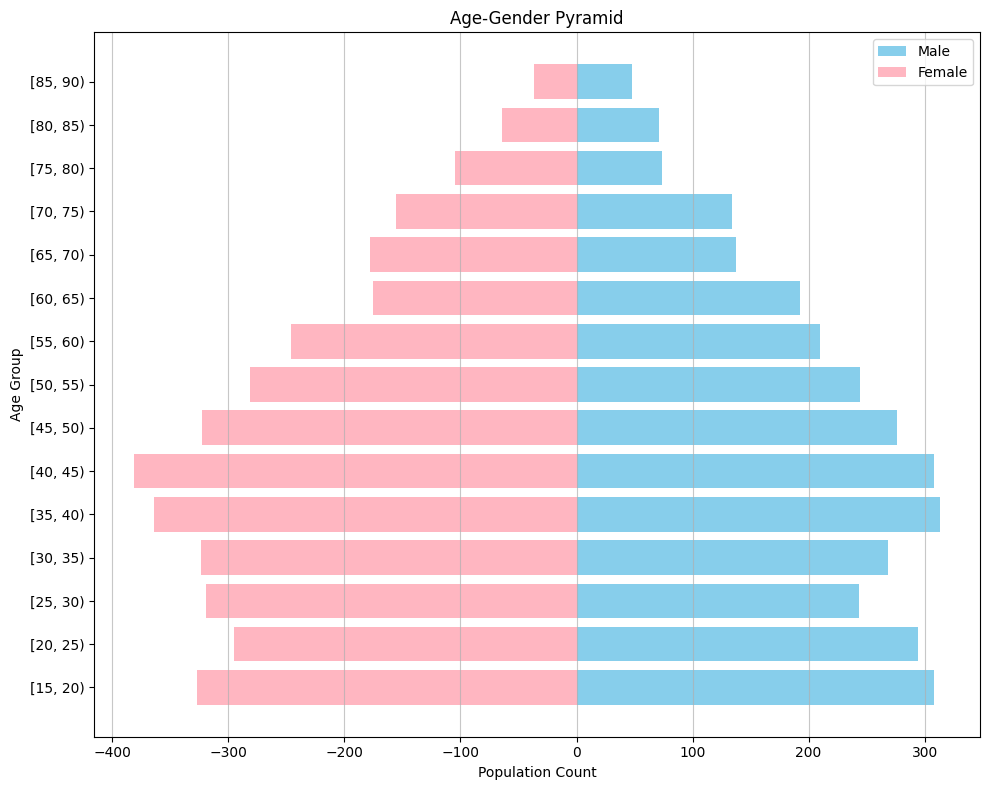

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('W-T2_A24census-1 - Copy_cor.csv')

# Create age groups
df['Age'] = pd.cut(df['Age'], bins=range(15, 95, 5), right=False)

# Group by age group and gender
age_gender_counts = df.groupby(['Age', 'Gender']).size().unstack().fillna(0)

# Convert Female count to negative for pyramid shape
age_gender_counts['Female'] *= -1

# Plot the pyramid
plt.figure(figsize=(10, 8))
age_groups = age_gender_counts.index.astype(str)

plt.barh(age_groups, age_gender_counts['Male'], color='skyblue', label='Male')
plt.barh(age_groups, age_gender_counts['Female'], color='lightpink', label='Female')

plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Age-Gender Pyramid')
plt.legend()
plt.grid(True, axis='x', alpha=0.7)
plt.tight_layout()
plt.savefig('pyramid.png', bbox_inches='tight') 
plt.show()

The population pyramid illustrates a growing population. The largest age groups are those between 35–45 years old among females, 15-10 and 35-45 years among males, indicating a high working-age rate and a need for creation workplaces and education facilities as well. People with the 60+ age groups being notably smaller. 

Calculate in percentage unemployement rate

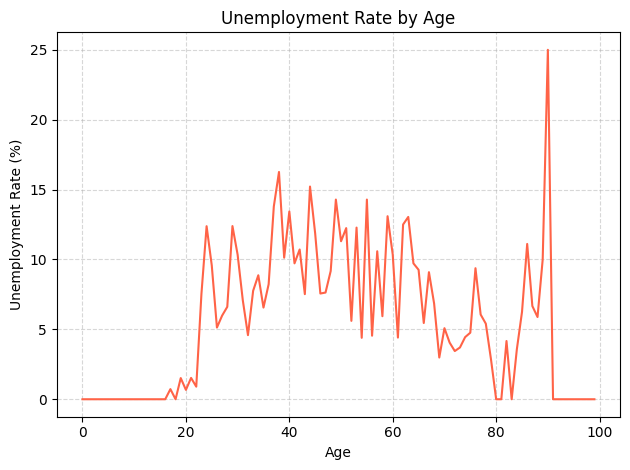

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('W-T2_A24census-1 - Copy_cor.csv')

# Clean up Age column
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age', 'Occupation'])
df['Age'] = df['Age'].astype(int)

# Create 'Status' column
df['Occupation'] = df['Occupation'].astype(str).str.lower().str.strip()
df['Status'] = 'Employed'
df.loc[df['Occupation'].isin(['unemployed', 'retired', '']), 'Status'] = 'Unemployed'

# Count employed and unemployed per age
counts = df.groupby(['Age', 'Status']).size().unstack().fillna(0)

# Calculate unemployment rate
counts['Rate'] = (counts['Unemployed'] / (counts['Employed'] + counts['Unemployed'])) * 100

# Plot
plt.plot(counts.index, counts['Rate'], color='tomato')
plt.title('Unemployment Rate by Age')
plt.xlabel('Age')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('unemployment.png', bbox_inches='tight') 
plt.show()

According to the Unemployment rate, the highest percentage of unemployed people is in the age group 20-40 and 85-90. Some reasons can be a key factor, for instance, low work experience, graduation, lack of suitable work or not enough skills for a position. From 40- to 80-year-old we can see a decrease in unemployment trend. From the age 45-65 the unemployment seems to be stable due to constant work and appropriate experience. As for a retirement age 80-90, we can see a slightly increase in unemployment. 

Calculate the persentage of marriage and divorce rate

In [105]:
df = pd.read_csv('W-T2_A24census-1 - Copy_cor.csv')

# Clean up columns
df['Marital Status'] = df['Marital Status'].astype(str).str.strip().str.title()
df['House Number'] = df['House Number'].astype(str).str.strip()  # Replace with your actual column name

# Marital Status Rates
total_people = len(df)
marital_counts = df['Marital Status'].value_counts()

marriage_rate = (marital_counts.get('Married', 0) / total_people) * 100
divorce_rate = (marital_counts.get('Divorced', 0) / total_people) * 100

print(f"Marriage Rate: {marriage_rate:.2f}%")
print(f"Divorce Rate: {divorce_rate:.2f}%")

Marriage Rate: 28.26%
Divorce Rate: 9.26%


Calculate Average Household Occupancy

In [106]:
# Count people per house
df['Full Address'] = df['House Number'].astype(str).str.strip() + ' ' + df['Street'].astype(str).str.strip()
household_sizes = df.groupby('Full Address').size()
average_occupancy = household_sizes.mean()
print(f"Average Household Occupancy: {average_occupancy:.2f} people per household")

Average Household Occupancy: 2.54 people per household


“The average household size remained similar over the last 10 years, with 2.36 residents per household in both 2012 and in 2022” (UK Government, 2023).   
According to the data, the Average Household Occupancy in the census data is 2.54 people per household. The average household size is approximately 2 to 4 individuals per household. As for divorce and marriage rate, we found out that marriage rate is 28.26% and divorce rate is 9.26%. A small number of people is divorced and live alone, while marriage people have children and live together. There is minimal evidence of overcrowding. 

### Conclusion

This analysis illustrates that on an unoccupied plot of land should be built a low-density housing which would fit better to developing demographic trends, indicating a growing number of young families and an aging population. What is more, the town should increase spending on schooling due to the fact that it is a burning issue in the town because current schooling provisions appear insufficient. These findings are based on demographic distribution, occupational data, and religion analysis, and are supported by statistical and visual evidence from the census dataset. 
In addition, the above improvements can help the town to satisfy residents needs and invest in its future to provide residents with a workplaces and social stability. Thus, the clear policy and rules should be created. Such measures can help the town to grow and prevent administrative confusion.